# Visiumator tissue detection

Here we use the pipeline developed by Nadav Yayon to align tissue image and remove the spots that dont contain tissue: https://github.com/Teichlab/thymus_spatial_atlas/tree/main/ImageSpot/visiumator

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
# Our main plotting package (must have explicit import of submodules)
import bokeh.io
from bokeh.plotting import show, output_notebook
import pandas as pd
import socket
os.chdir('/nfs/team205/ny1/ThymusSpatialAtlas/ImageSpot/jupyter-annotator/')
import tissue_tag as tt
os.chdir('/nfs/team205/ny1/ThymusSpatialAtlas/ImageSpot/')
import visiumator as vm
import matplotlib.pyplot as plt
import scanpy as sc
output_notebook()
#host = '5011'

Loading BokehJS ...

In [3]:
sp_data_folder="/nfs/team205/rb29/mice_gutTCRtg_project/data/visium/"
meta = pd.read_csv(sp_data_folder+'Meta_mouse_gut_spatial.csv', index_col = 0)

In [4]:
meta

,Sanger_ID,Sample_name,Slide_ID,Slide,Capture_area,Mouse,Conditions
Sample,,,,,,,
1A_Hh.only,Mus_Tcel13255053,1A_Hh.only,V12Y31-030_A1,V12Y31-030,A1,1A,Hh_only
1B_Hh.anti_IL10r,Mus_Tcel13255054,1B_Hh.anti_IL10r,V12Y31-030_B1,V12Y31-030,B1,1B,Hh_anti-Il10r
2A_Hh.only,Mus_Tcel13255055,2A_Hh.only,V12Y31-030_C1,V12Y31-030,C1,2A,Hh_only
2B_Hh.anti_IL10r,Mus_Tcel13255056,2B_Hh.anti_IL10r,V12Y31 - 030_D1,V12Y31-030,D1,2B,Hh_anti-Il10r
3A_Hh.only,Mus_Tcel13290868,3A_Hh.only,V12U21-349-A1,V12U21-349,A1,3A,Hh_only
3B_Hh.anti_IL10r,Mus_Tcel13290869,3B_Hh.anti_IL10r,V12U21-349-B1,V12U21-349,B1,3B,Hh_anti-Il10r
4A_Hh.only,Mus_Tcel13290870,4A_Hh.only,V12U21-349-C1,V12U21-349,C1,4A,Hh_only
4B_Hh.anti_IL10r,Mus_Tcel13290871,4B_Hh.anti_IL10r,V12U21-349-D1,V12U21-349,D1,4B,Hh_anti-Il10r


In [5]:
meta['Sanger_ID']

Sample
1A_Hh.only          Mus_Tcel13255053
1B_Hh.anti_IL10r    Mus_Tcel13255054
2A_Hh.only          Mus_Tcel13255055
2B_Hh.anti_IL10r    Mus_Tcel13255056
3A_Hh.only          Mus_Tcel13290868
3B_Hh.anti_IL10r    Mus_Tcel13290869
4A_Hh.only          Mus_Tcel13290870
4B_Hh.anti_IL10r    Mus_Tcel13290871
Name: Sanger_ID, dtype: object

# Preprocessing (make sure allgnment is done properly!)

In [34]:
vis_path = '/nfs/team205/rb29/mice_gutTCRtg_project/data/visium/Mus_Tcel13290871/'
impath = '/nfs/team205/rb29/mice_gutTCRtg_project/data/visium_images/V12U21-349_D1.tif'

Scaling images and saving
Running Cellpose model for fiducial detection
   label   area  equivalent_diameter  perimeter  centroid-0   centroid-1
0      1  682.0            29.467768  94.669048  321.375367  3609.438416
1      2  635.0            28.434259  92.669048  321.814173  3364.274016
2      3  656.0            28.900608  93.497475  323.245427  3216.120427
3      4  667.0            29.141908  94.083261  323.313343  3415.380810
4      5  604.0            27.731511  89.254834  323.420530  3021.581126
found - 428 Candidate points
[[0, 9], [2, 15], [5, 286], [7, 63], [8, 19], [9, 56], [12, 111], [15, 398], [17, 389], [21, 295], [22, 416], [23, 407], [25, 411]]
Finding Transformation Matrix
[[0, 9], [2, 15], [5, 286], [7, 63], [8, 19], [9, 56], [12, 111], [15, 398], [17, 389], [21, 295], [22, 416], [23, 407], [25, 411]]
[[ 5.65100066e-01 -1.52558190e-04 -1.61913364e+04]
 [-8.21865894e-04  5.64910310e-01  2.67832330e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


<Figure size 960x720 with 0 Axes>

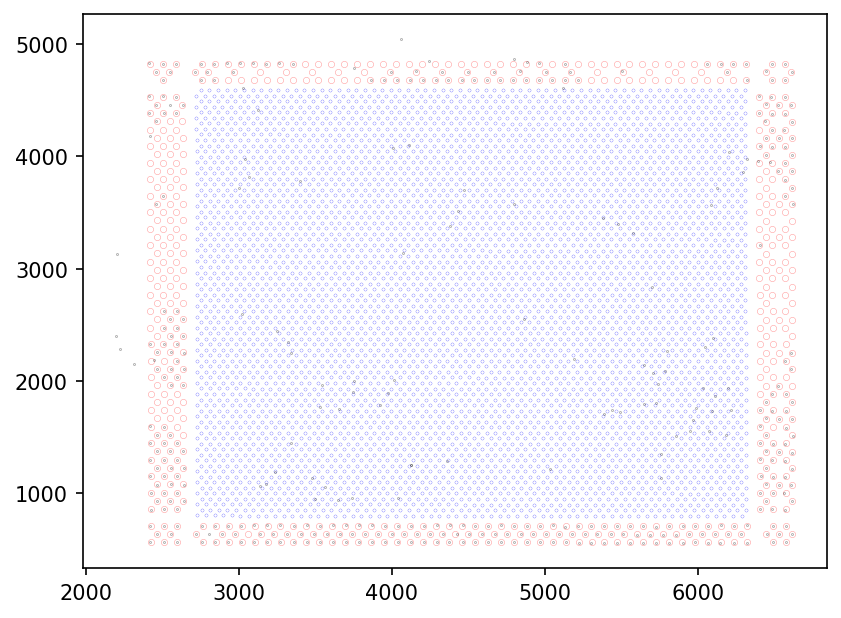

DONE!
Done!


<Figure size 1280x960 with 0 Axes>

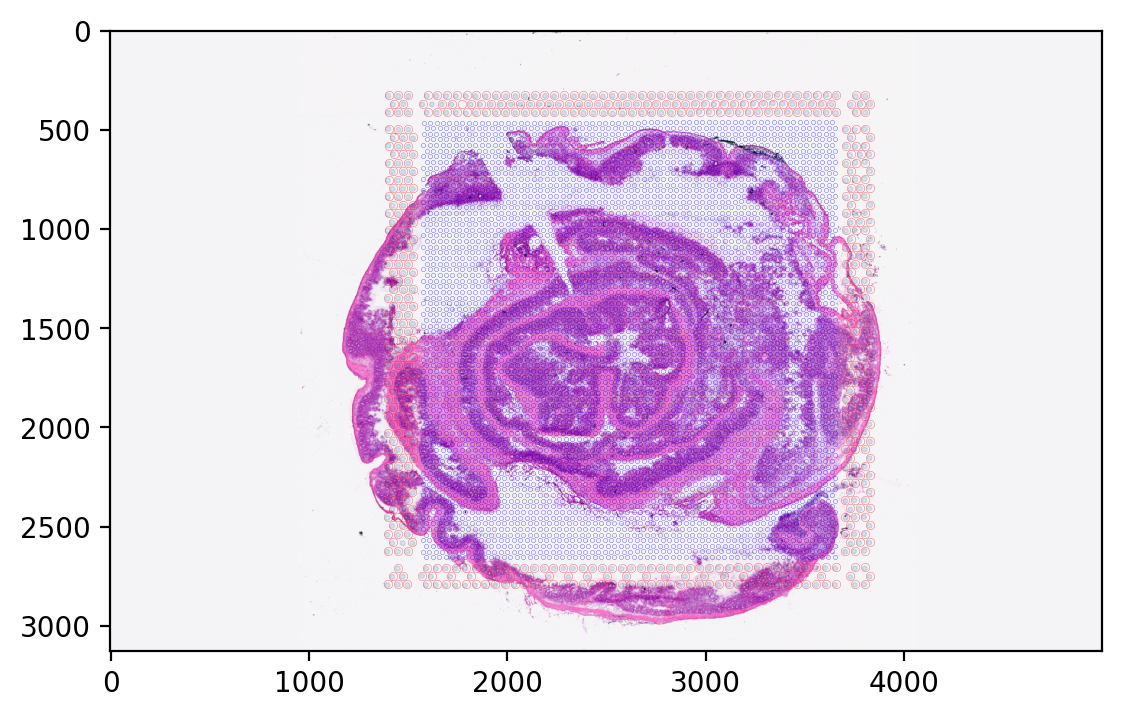

In [35]:
vm.align_and_extract(path_10x=vis_path,path_image=impath,ref_path='/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/final_notebooks/Tissue_detection/ReferenceData/',
                     use_10X_allignment=False, sensitivity=2)

Otsu threhold found to be - 192.0
              Barcode  UnderTissue  Col  Row           X            Y
0  ACGCCTGACACGCGCT-1          0.0  0.0  0.0  800.453850  2726.031504
1  TACCGATCCAACACTT-1          0.0  1.0  1.0  849.609928  2754.205517
2  ATTAAAGCGGACGAGC-1          0.0  0.0  2.0  800.438594  2782.522535
3  GATAAGGGACGATTAG-1          0.0  1.0  3.0  849.594672  2810.696548
4  GTGCAAATCACCAATA-1          0.0  0.0  4.0  800.423338  2839.013566


<Figure size 1280x960 with 0 Axes>

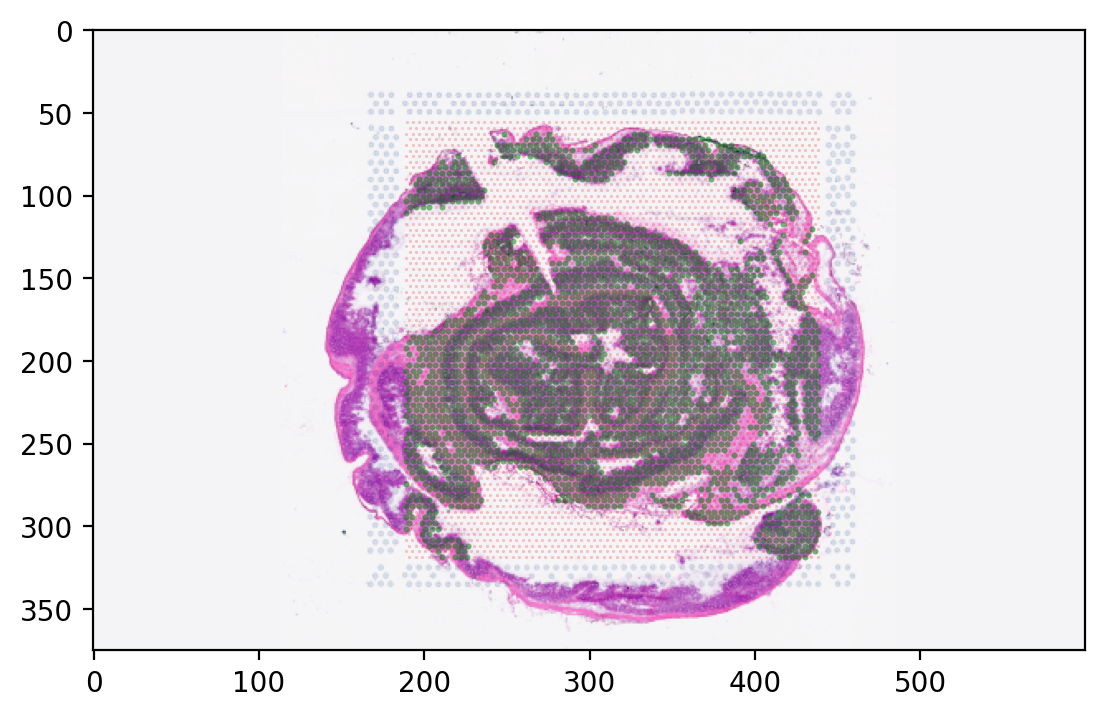

,Barcode,UnderTissue,Col,Row,X,Y
0,ACGCCTGACACGCGCT-1,0.0,0.0,0.0,800.453850,2726.031504
1,TACCGATCCAACACTT-1,0.0,1.0,1.0,849.609928,2754.205517
2,ATTAAAGCGGACGAGC-1,0.0,0.0,2.0,800.438594,2782.522535
3,GATAAGGGACGATTAG-1,0.0,1.0,3.0,849.594672,2810.696548
4,GTGCAAATCACCAATA-1,0.0,0.0,4.0,800.423338,2839.013566
...,...,...,...,...,...,...
4987,GAACGTTTGTATCCAC-1,1.0,77.0,123.0,4585.120962,6194.724229
4988,ATTGAATTCCCTGTAG-1,1.0,76.0,124.0,4535.949628,6223.041247
4989,TACCTCACCAATTGTA-1,0.0,77.0,125.0,4585.105706,6251.215260
4990,AGTCGAATTAGCGTAA-1,1.0,76.0,126.0,4535.934373,6279.532278


In [36]:
vm.detect_tissue_otsu(path=vis_path,ref_path='/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/final_notebooks/Tissue_detection/ReferenceData/')

Otsu threhold found to be - 192.0
              Barcode  UnderTissue  Col  Row           X            Y
0  ACGCCTGACACGCGCT-1          0.0  0.0  0.0  800.453850  2726.031504
1  TACCGATCCAACACTT-1          0.0  1.0  1.0  849.609928  2754.205517
2  ATTAAAGCGGACGAGC-1          0.0  0.0  2.0  800.438594  2782.522535
3  GATAAGGGACGATTAG-1          0.0  1.0  3.0  849.594672  2810.696548
4  GTGCAAATCACCAATA-1          0.0  0.0  4.0  800.423338  2839.013566


<Figure size 1280x960 with 0 Axes>

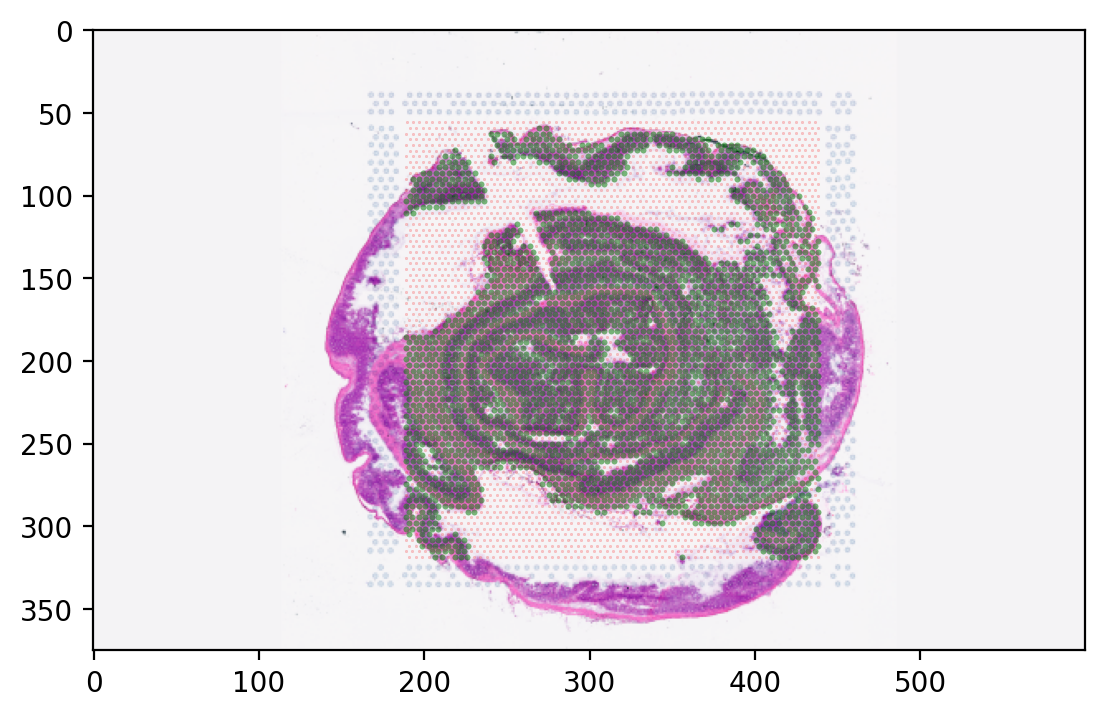

,Barcode,UnderTissue,Col,Row,X,Y
0,ACGCCTGACACGCGCT-1,0.0,0.0,0.0,800.453850,2726.031504
1,TACCGATCCAACACTT-1,0.0,1.0,1.0,849.609928,2754.205517
2,ATTAAAGCGGACGAGC-1,0.0,0.0,2.0,800.438594,2782.522535
3,GATAAGGGACGATTAG-1,0.0,1.0,3.0,849.594672,2810.696548
4,GTGCAAATCACCAATA-1,0.0,0.0,4.0,800.423338,2839.013566
...,...,...,...,...,...,...
4987,GAACGTTTGTATCCAC-1,1.0,77.0,123.0,4585.120962,6194.724229
4988,ATTGAATTCCCTGTAG-1,1.0,76.0,124.0,4535.949628,6223.041247
4989,TACCTCACCAATTGTA-1,0.0,77.0,125.0,4585.105706,6251.215260
4990,AGTCGAATTAGCGTAA-1,1.0,76.0,126.0,4535.934373,6279.532278


In [37]:
vm.detect_tissue_otsu(path=vis_path,ref_path='/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/final_notebooks/Tissue_detection/ReferenceData/',sensitivity=1.1)